<a href="https://colab.research.google.com/github/HayeonKimm/project/blob/master/Project/Machine-Learning/toy_machine_pjt/MLP_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mount Drive and Import Pacakges

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Data

### Load and prepare data

In [ ]:
root = os.path.join(os.getcwd(), "drive", "MyDrive", "Colab Notebooks", "data")
root

'/content/drive/MyDrive/Colab Notebooks/data'

In [ ]:
def get_data(data, root, download=True, transform=transforms.ToTensor()):
  if data.lower() == "mnist":
    train = datasets.MNIST(root=root, train=True, download=download, transform=transform)
    test = datasets.MNIST(root=root, train=False, download=download, transform=transform)
  elif data.lower() == "fmnist":
    train = datasets.FashionMNIST(root=root, train=True, download=download, transform=transform)
    test = datasets.FashionMNIST(root=root, train=False, download=download, transform=transform)
  else:
    raise ValueError(f"data name {data} is not supported.")

  return train, test

In [ ]:
mnist_tr, mnist_test = get_data(data="MNIST", root=root)
fmnist_tr, fmnist_test = get_data(data="FMNIST", root=root)

### Check datasets

In [ ]:
def plot_mnist(data, figsize=(20, 10)):
  fig = plt.figure(figsize=figsize)
  for i in range(18):
    img = data[i][0]
    ax = fig.add_subplot(3, 6, i+1)
    ax.imshow(img.reshape(28, 28), cmap="gray")
    ax.set_title(f"Label: {data[i][1]}")
  fig.show()
  pass

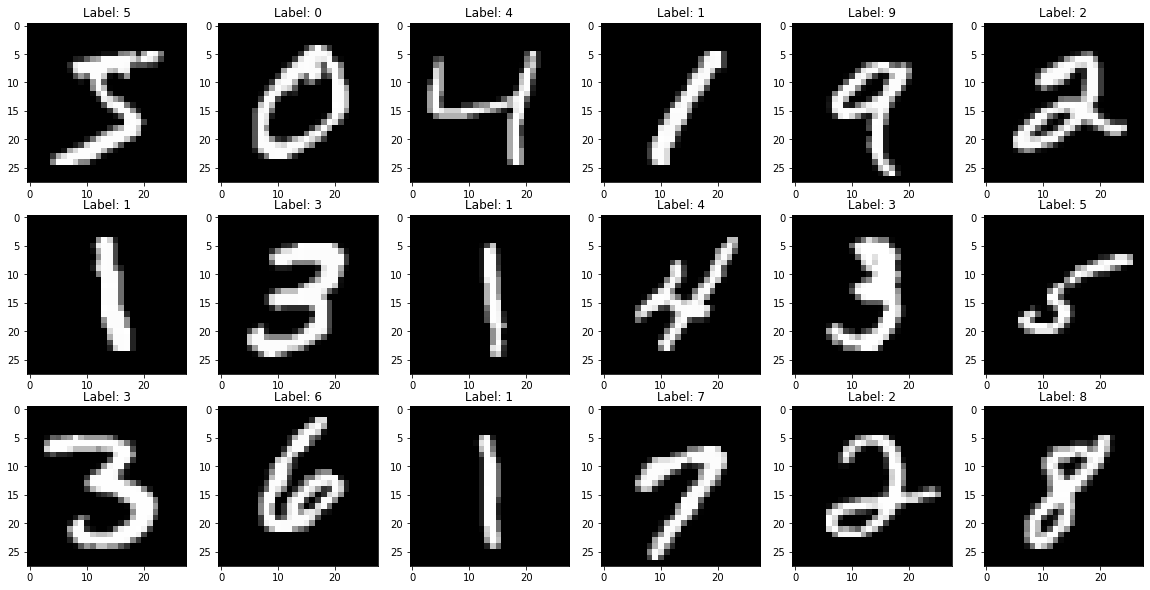

In [ ]:
plot_mnist(data=mnist_tr)

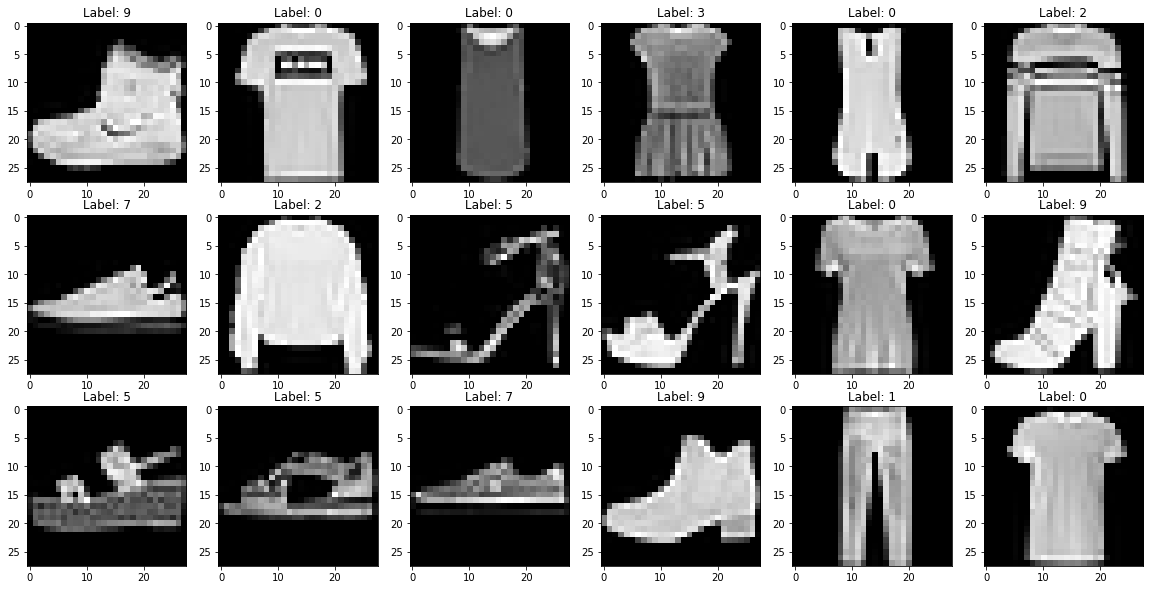

In [ ]:
plot_mnist(data=fmnist_tr)

### Split train dataset into train and valid

In [ ]:
class mnist_dataset(Dataset):
  def __init__(self, data, targets, transform=None, target_transform=None):
    super().__init__()

    self.data = data
    self.targets = targets
    self.transform = transform
    self.target_transform = target_transform
    pass

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    x, y = self.data[idx], self.targets[idx]

    if self.transform:
      x = self.transform(x)
    if self.target_transform:
      y = self.target_transform(y)

    return x, y

In [ ]:
def split_train_valid(dataset, valid_ratio=0.1):

  n_valid = int(len(dataset) * valid_ratio)
  
  train_data = dataset.data[:-n_valid].numpy()
  valid_data = dataset.data[-n_valid:].numpy()
  train_targets = dataset.targets[:-n_valid]
  valid_targets = dataset.targets[-n_valid:]

  train = mnist_dataset(data=train_data, targets=train_targets, transform=dataset.transform, target_transform=dataset.target_transform)
  valid = mnist_dataset(data=valid_data, targets=valid_targets, transform=dataset.transform, target_transform=dataset.target_transform)

  return train, valid

In [ ]:
# def split_train_valid(dataset, valid_ratio=0.1):
#   n_valid = int(len(dataset) * valid_ratio)
  
#   train_data = dataset.data[:-n_valid].numpy()
#   valid_data = dataset.data[-n_valid:].numpy()
#   train_targets = dataset.targets[:-n_valid]
#   valid_targets = dataset.targets[-n_valid:]

#   train = mnist_dataset(data=train_data, targets=train_targets, transform=dataset.transform, target_transform=dataset.target_transform)
#   valid = mnist_dataset(data=valid_data, targets=valid_targets, transform=dataset.transform, target_transform=dataset.target_transform)

#   return train, valid

In [ ]:
mnist_train, mnist_valid = split_train_valid(dataset=mnist_tr)
fmnist_train, fmnist_valid = split_train_valid(dataset=fmnist_tr)

### Check shuffling result

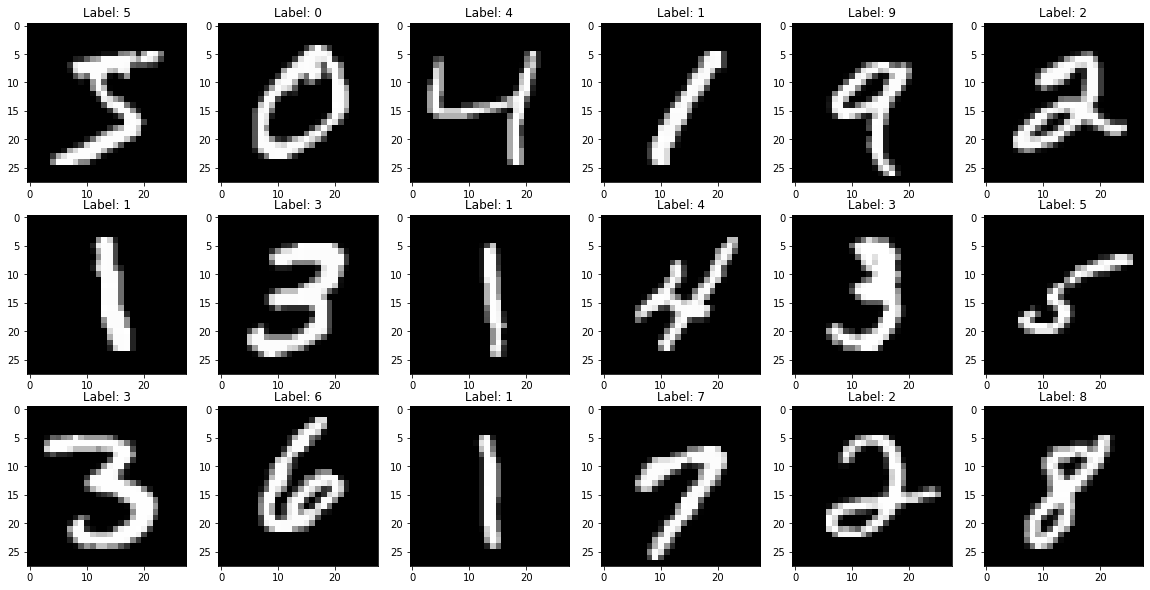

In [ ]:
plot_mnist(data=mnist_train)

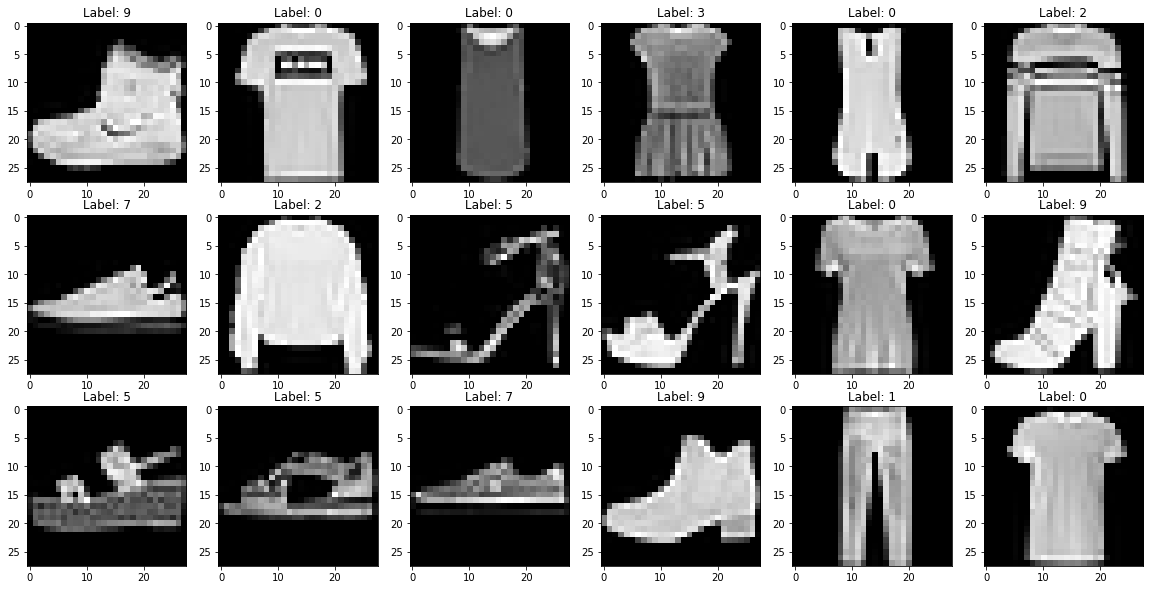

In [ ]:
plot_mnist(data=fmnist_train)

### Get loaders

In [ ]:
b_size = 256

In [ ]:
mnist = [DataLoader(dataset=d, batch_size=b_size, shuffle=True, drop_last=True) for d in [mnist_train, mnist_valid, mnist_test]]
fmnist = [DataLoader(dataset=d, batch_size=b_size, shuffle=True, drop_last=True) for d in [fmnist_train, fmnist_valid, fmnist_test]]
datas = {"mnist": mnist, "fmnist": fmnist}

## 2. Model

### Base model

In [ ]:
class BaseClassifier(nn.Module):
  def __init__(self, n_class=10):
    super().__init__()

    self.name = "base"
    self.model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(28 * 28, 64),
        nn.ReLU(),
        nn.Linear(64, 64),
        nn.ReLU(),
        nn.Linear(64, n_class),
    )

  def forward(self, x):
    return self.model(x)


class LionMNISTClassifier(nn.Module):
  def __init__(self, n_class=10):
    super().__init__()
    self.name = "base2"
    self.model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(28 * 28, 256),
        nn.ReLU(),
        nn.Linear(256, 128),
        nn.ReLU(),
        nn.Linear(128, n_class),
    )

  def forward(self, x):
    return self.model(x)


class Lion(nn.Module):
  def __init__(self, n_class=10):
    super().__init__()
    self.name = "base3"
    self.model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(28 * 28, 512),
        nn.ReLU(),
        nn.Linear(512, 128),
        nn.ReLU(),
        nn.Linear(128, n_class),
    )

  def forward(self, x):
    return self.model(x)

### Customized models

In [ ]:
class FirstClassifier(nn.Module):
  def __init__(self, n_class=10):
    super().__init__()

    self.name = "first"
    self.model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(28*28,64),
        nn.Sigmoid(),
        nn.Linear(64,64),
        nn.Sigmoid(),
        nn.Linear(64, n_class),


    )

    
    # Model을 만들어 봅시다.
    # 구조와 activation function, 그 외에 다른 기법들의 사용 유무와 사용 위치를 정할 수 있습니다.
    # self.model =   

  def forward(self, x):
    return self.model(x)

# FirstClassifier 말고도 다양한 모델을 만들어서 학습을 시켜보고 성능을 비교해 볼 수 있습니다.

In [ ]:
class SecondClassifier(nn.Module):
  def __init__(self, n_class=10):
    super().__init__()

    self.name = "second"
    self.model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(28*28,64),
        nn.LeakyReLU(),
        nn.Linear(64,64),
        nn.LeakyReLU(),
        nn.Linear(64, n_class),


    )

    
    # Model을 만들어 봅시다.
    # 구조와 activation function, 그 외에 다른 기법들의 사용 유무와 사용 위치를 정할 수 있습니다.
    # self.model =   

  def forward(self, x):
    return self.model(x)

# FirstClassifier 말고도 다양한 모델을 만들어서 학습을 시켜보고 성능을 비교해 볼 수 있습니다.



# Flatten도 하고 Linear, Relu+Dropout

class ForDropoutClassifier(nn.Module):
  def __init__(self, n_class=10):
    super().__init__()

    self.name = "three"
    self.model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(28 * 28, 256),
        nn.Dropout(p=0.5),
        nn.ReLU(),
        nn.Linear(256, 128),
        nn.Dropout(p=0.5),
        nn.ReLU(),
        nn.Linear(128, n_class),
    )

  def forward(self, x):
    return self.model(x)

In [ ]:
class LionMNISTDropoutBNClassifier(nn.Module):
  def __init__(self, n_class=10):
    super().__init__()

    self.name = 'base3+no'
    self.model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(28 * 28, 512),
        nn.BatchNorm1d(512),
        nn.Dropout(p=0.5),
        nn.ReLU(),
        nn.Linear(512, 256),
        nn.BatchNorm1d(256),
        nn.Dropout(p=0.5),
        nn.ReLU(),
        nn.Linear(256, n_class),
    )

  def forward(self, x):
    return self.model(x)



# class Lion(nn.Module):
#   def __init__(self, n_class=10):
#     super().__init__()
#     self.name = "base3"
#     self.model = nn.Sequential(
#         nn.Flatten(),
#         nn.Linear(28 * 28, 512),
#         nn.ReLU(),
#         nn.Linear(512, 128),
#         nn.ReLU(),
#         nn.Linear(128, n_class),
#     )

#   def forward(self, x):
#     return self.model(x)

### Using get_model function

In [ ]:
def get_model(model_name):
  if model_name.lower() == "base":
    return BaseClassifier()
  elif model_name.lower() == "first":
    return FirstClassifier()
  elif model_name.lower() == 'second':
    return SecondClassifier()
  elif model_name.lower() == 'three':
    return ForDropoutClassifier()
  elif model_name.lower() == 'base3+no':
    return LionMNISTDropoutBNClassifier()
  elif model_name.lower() == 'base2':
    return LionMNISTClassifier()
  elif model_name.lower() == 'base3':
    return Lion()

    # return LionMNISTClassifier()

  else:
    raise ValueError(f"model name {model_name} is not supported")

# get_model 함수가 activation function을 받고, 각 classifier를 정의할 때 activation function을 함께 넘겨주도록 만들 수도 있습니다!
# 그렇게 하면 훨씬 적은 수의 model class로 더 다양한 경우를 사용할 수 있을 것 같네요.
# 여러분이 원하는 기능을 가지도록 다양한 model class와 get_model 함수들을 코딩해 보세요!

## 3. Trainer

### Make trainer

In [ ]:
class Trainer(nn.Module):
  def __init__(self, model, opt="sgd", lr=0.001, device="cpu"):
    super().__init__()
    self.path = f"_model_{model.name}_opt_{opt}_lr_{lr}"

    self.model = model
    self.loss = nn.CrossEntropyLoss()
    self._get_optimizer(opt=opt.lower(), lr=lr)

    self.device = device
    pass

  def _get_optimizer(self, opt, lr=0.001):
    # 몇 가지 optimizer를 더 찾아서 적용해 볼까요?
    if opt == "sgd":
      self.optimizer = torch.optim.SGD(params=self.model.parameters(), lr=lr)
    elif opt == "adam":
      self.optimizer = torch.optim.Adam(params=self.model.parameters(), lr=lr)
    elif opt == 'adagrad':
      self.optimizer = torch.optim.Adagrad(params=self.model.parameters(), lr=lr)
    
    elif opt == 'rmsprop':
      self.optimizer = torch.optim.RMSprop(params=self.model.parameters(), lr=lr)

    else:
      raise ValueError(f"optimizer {opt} is not supproted")

  def train(self, data_name, train_loader, valid_loader, max_epochs=10):
    print("★★★★★★ 트레이닝 결과 ★★★★★★")
    history = {"train_loss": [], "train_acc": [], "valid_loss": [], "valid_acc": []}
    for e in range(max_epochs):
      train_loss, train_acc = self._train_epoch(train_loader)
      valid_loss, valid_acc = self._valid_epoch(valid_loader)

      history["train_loss"].append(train_loss)
      history["train_acc"].append(train_acc)
      history["valid_loss"].append(valid_loss)
      history["valid_acc"].append(valid_acc)

      if e % 10 == 0:
        print(f"Epoch: {e}, train loss: {train_loss:>6f}, train acc: {train_acc:>3f}, valid loss: {valid_loss:>6f}, valid acc: {valid_acc:>3f}")

    self.plot_history(history, data_name, max_epochs)

  def _train_epoch(self, train_loader):
    epoch_loss, epoch_acc = 0, 0
    self.model.train()
    for (x, y) in train_loader:
      x = x.to(self.device)
      y = y.to(self.device)

      y_hat = self.model(x)
      loss = self.loss(y_hat, y)

      self.optimizer.zero_grad()
      loss.backward()
      self.optimizer.step()

      epoch_loss += loss.to("cpu").item()
      epoch_acc += (y_hat.argmax(1) == y).type(torch.float).to("cpu").mean().item()

    return epoch_loss / len(train_loader), epoch_acc / len(train_loader)
  
  def _valid_epoch(self, valid_loader):
    epoch_loss, epoch_acc = 0, 0
    self.model.eval()
    with torch.no_grad():
      for (x, y) in valid_loader:
        x = x.to(self.device)
        y = y.to(self.device)

        y_hat = self.model(x)
        loss = self.loss(y_hat, y)

        epoch_loss += loss.to("cpu").item()
        epoch_acc += (y_hat.argmax(1) == y).type(torch.float).to("cpu").mean().item()

    return epoch_loss / len(valid_loader), epoch_acc / len(valid_loader)

  def plot_history(self, history, data_name, max_epochs):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history["train_loss"], color="red", label="train loss")
    ax.plot(history["valid_loss"], color="blue", label="valid loss")
    ax.set_title("Loss")
    ax.legend()

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history["train_acc"], color="red", label="train acc")
    ax.plot(history["valid_acc"], color="blue", label="valid acc")
    ax.set_title("Acc")
    ax.legend()

    path = os.path.join(os.getcwd(), "drive", "MyDrive", "Colab Notebooks", "plots", f"data_{data_name}" + self.path + f"_max_epochs_{max_epochs}.png")
    plt.savefig(path, bbox_inches="tight")
    pass

  def test(self, test_loader):
    print("★★★★★★ 테스트 결과 ★★★★★★")
    epoch_loss, epoch_acc = 0, 0
    self.model.eval()
    with torch.no_grad():
      for (x, y) in test_loader:
        x = x.to(self.device)
        y = y.to(self.device)

        y_hat = self.model(x)
        loss = self.loss(y_hat, y)

        epoch_loss += loss.to("cpu").item()
        epoch_acc += (y_hat.argmax(1) == y).type(torch.float).to("cpu").mean().item()

    epoch_loss /= len(test_loader)
    epoch_acc /= len(test_loader)

    print(f"Test loss: {epoch_loss:>6f}, Test acc: {epoch_acc:>3f}")

### Train and test

In [ ]:
# len(datas['mnist'][1])

23

## 조건 1

모델 : base   
옵티마이저 : sgd, adam   
학습률 : 0.001, 0.005  
에포크 : 10, 30   (max epoch 값은 우선 30까지만 제한해두고 실험했다. 다른 조건만으로 높여보기 위해서)

mnist = 97.69 %  (===== Data: mnist, Model: base, Optimizer: adam, lr: 0.005, max_epochs: 30 =====)   
fminst = 88.19% (===== Data: fmnist, Model: base, Optimizer: adam, lr: 0.005, max_epochs: 30 =====)



In [ ]:
ds = ["mnist", "fmnist"]
models = ["base"]
opts = ["sgd",'adam']
lrs = [0.001,0.005]
max_epoch = [10,30]

===== Data: mnist, Model: base, Optimizer: sgd, lr: 0.001, max_epochs: 10 =====
===== Train Start =====
Epoch: 0, train loss: 2.304379, train acc: 0.127586, valid loss: 2.302794, valid acc: 0.130944
===== Test Start =====
Test loss: 2.247576, Test acc: 0.264323
===== Data: mnist, Model: base, Optimizer: sgd, lr: 0.001, max_epochs: 30 =====
===== Train Start =====
Epoch: 0, train loss: 2.299437, train acc: 0.109728, valid loss: 2.293774, valid acc: 0.131454
Epoch: 10, train loss: 2.196475, train acc: 0.494103, valid loss: 2.183118, valid acc: 0.539912
Epoch: 20, train loss: 1.894327, train acc: 0.587481, valid loss: 1.853482, valid acc: 0.612262
===== Test Start =====
Test loss: 1.289187, Test acc: 0.713742
===== Data: mnist, Model: base, Optimizer: sgd, lr: 0.005, max_epochs: 10 =====
===== Train Start =====
Epoch: 0, train loss: 2.291696, train acc: 0.104241, valid loss: 2.272576, valid acc: 0.136549
===== Test Start =====
Test loss: 0.789964, Test acc: 0.789663
===== Data: mnist, Mod

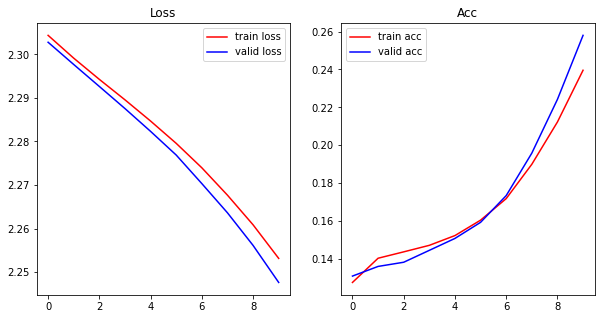

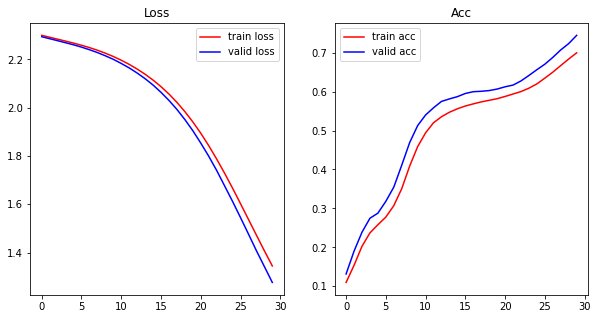

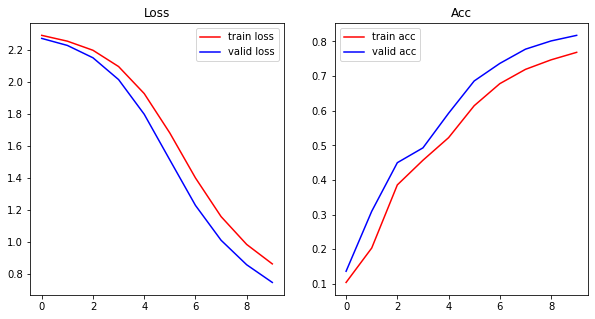

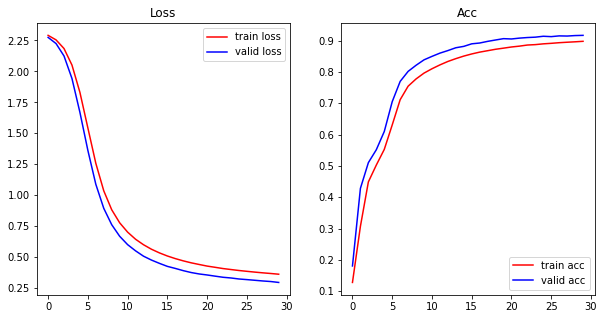

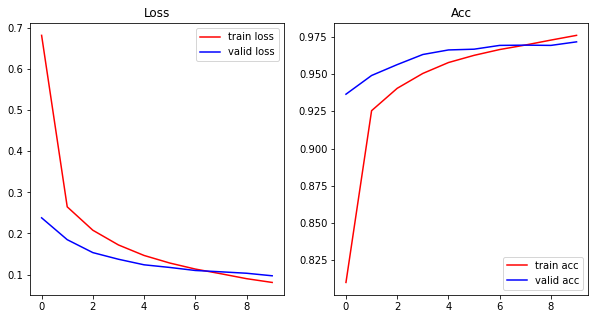

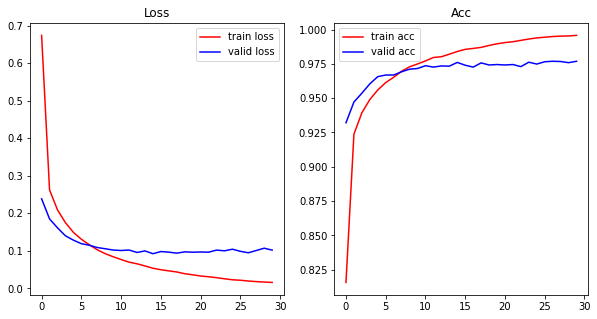

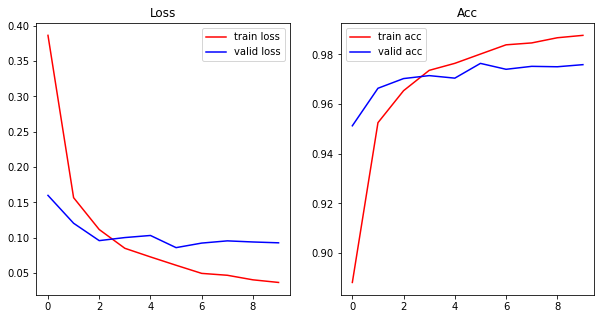

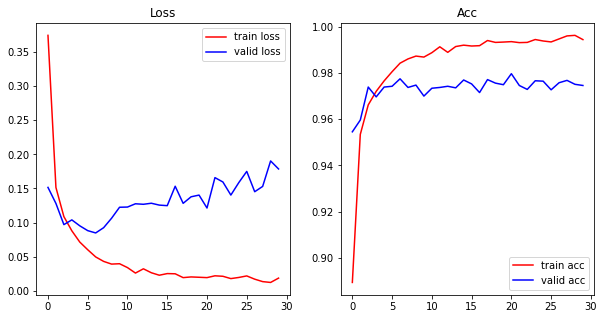

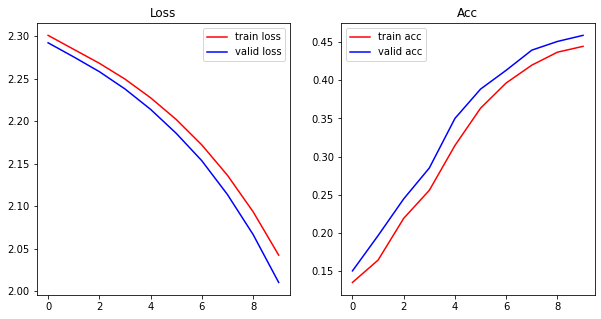

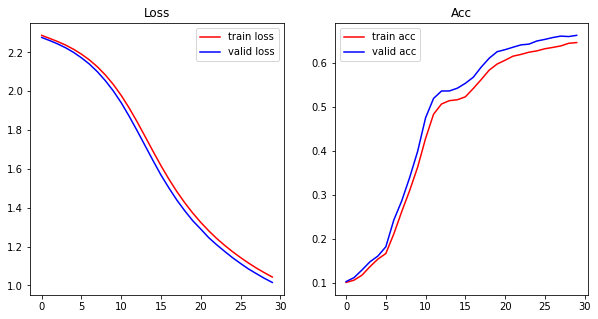

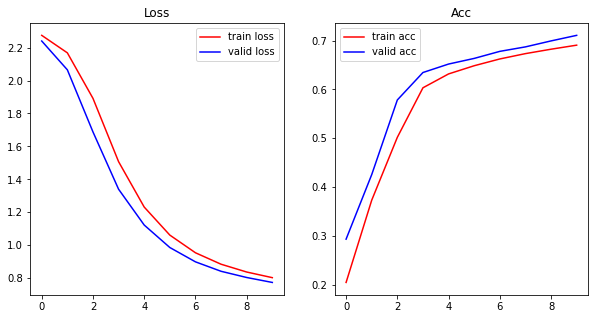

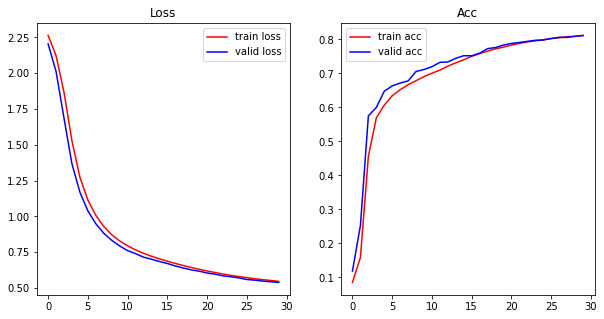

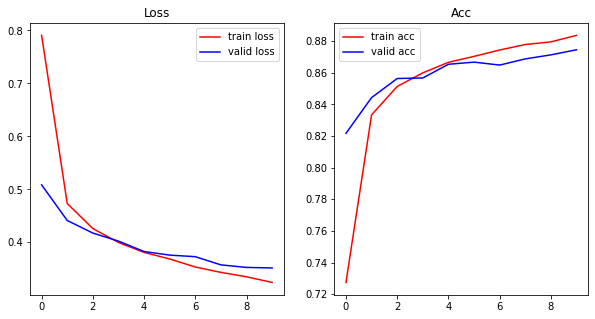

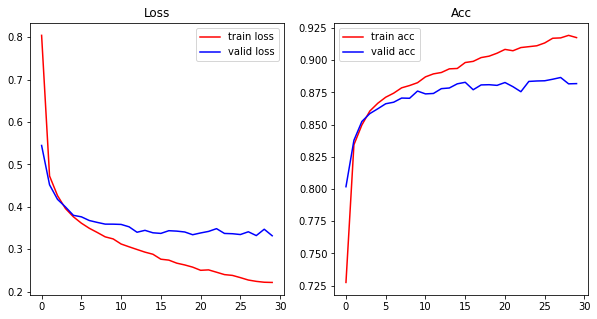

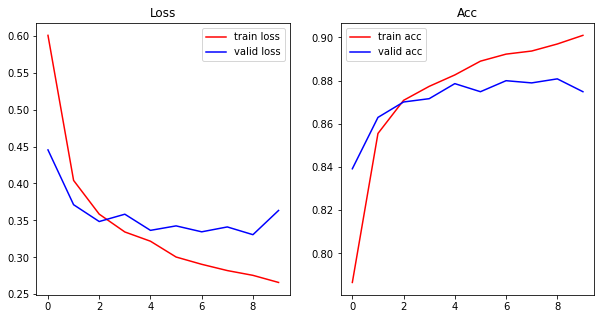

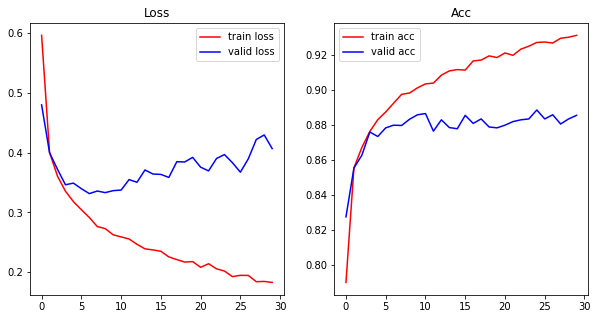

In [ ]:
for d in ds:
  for m in models:
    for opt in opts:
      for lr in lrs:
        for max_epochs in max_epoch:
          model = get_model(model_name = m)
          trainer = Trainer(model=model, opt=opt, lr=lr)
          print(f"===== Data: {d}, Model: {m}, Optimizer: {opt}, lr: {lr}, max_epochs: {max_epochs} =====")
          trainer.train(data_name=d, train_loader=datas[d][0], valid_loader=datas[d][1], max_epochs=max_epochs)
          trainer.test(test_loader=datas[d][2])

## 조건 2

모델 : first  
옵티마이저 : adam, rmsprop (sgd는 성능이 좋지 않아 뺐다.모델이 달라지면 다를 수도 있지만 우선 진행, 마지막에 한꺼번에 돌릴 예정)   
학습률 : 0.001, 0.005  
에포크 : 30 (10보단 30이 더 성능이 좋다)   

mnist = 97.40 %  (===== Data: mnist, Model: first, Optimizer: adam, lr: 0.005, max_epochs: 30 =====)   
fminst = 88.07% (===== Data: fmnist, Model: first, Optimizer: adam, lr: 0.001, max_epochs: 30 =====)

In [ ]:
ds = ["mnist", "fmnist"]
models = ["first"]
opts = ['adam','rmsprop']
lrs = [0.001,0.005]
max_epoch = [30]

===== Data: mnist, Model: first, Optimizer: adam, lr: 0.001, max_epochs: 30 =====
===== Train Start =====
Epoch: 0, train loss: 1.602577, train acc: 0.564676, valid loss: 0.814925, valid acc: 0.845448
Epoch: 10, train loss: 0.127046, train acc: 0.964881, valid loss: 0.117009, valid acc: 0.967221
Epoch: 20, train loss: 0.061421, train acc: 0.982924, valid loss: 0.090698, valid acc: 0.973505
===== Test Start =====
Test loss: 0.092931, Test acc: 0.974058
===== Data: mnist, Model: first, Optimizer: adam, lr: 0.005, max_epochs: 30 =====
===== Train Start =====
Epoch: 0, train loss: 0.702607, train acc: 0.803999, valid loss: 0.210854, valid acc: 0.942425
Epoch: 10, train loss: 0.030134, train acc: 0.991704, valid loss: 0.094094, valid acc: 0.975204
Epoch: 20, train loss: 0.013813, train acc: 0.995517, valid loss: 0.114657, valid acc: 0.972656
===== Test Start =====
Test loss: 0.133479, Test acc: 0.974058
===== Data: mnist, Model: first, Optimizer: rmsprop, lr: 0.001, max_epochs: 30 =====
===

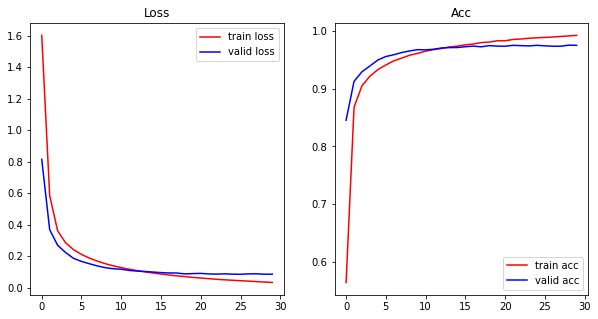

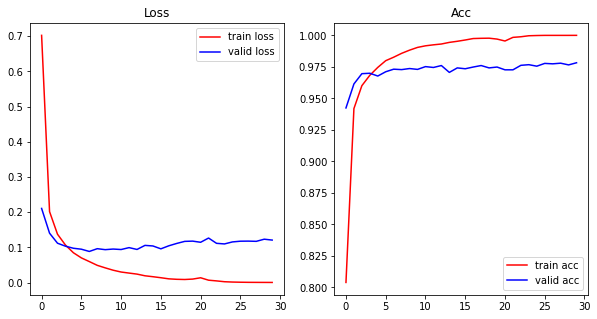

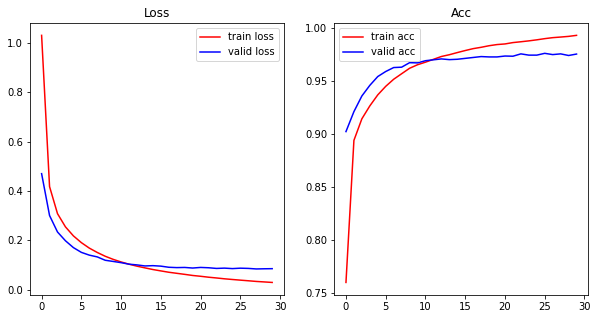

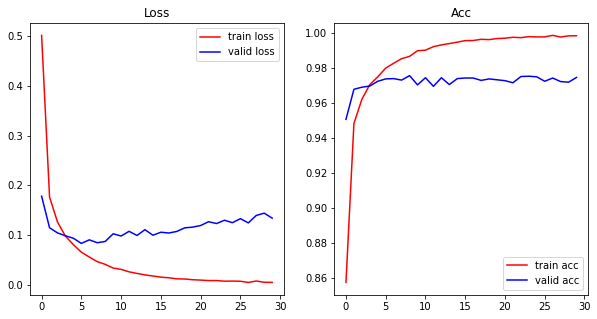

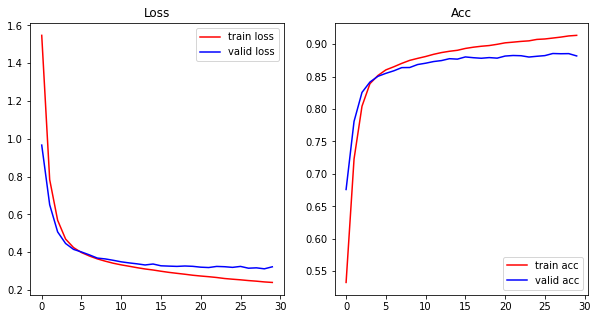

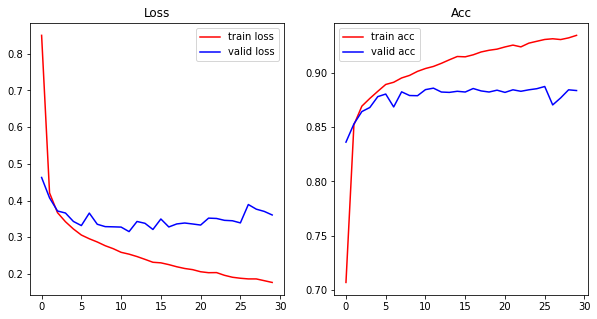

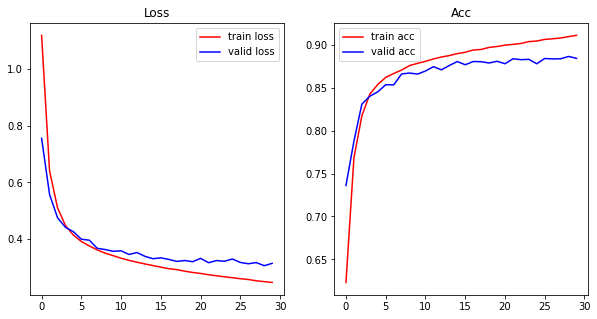

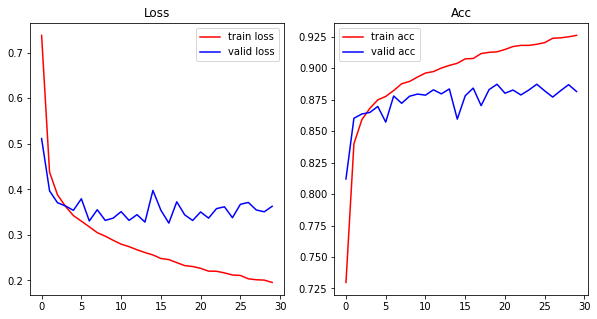

In [ ]:
for d in ds:
  for m in models:
    for opt in opts:
      for lr in lrs:
        for max_epochs in max_epoch:
          model = get_model(model_name = m)
          trainer = Trainer(model=model, opt=opt, lr=lr)
          print(f"===== Data: {d}, Model: {m}, Optimizer: {opt}, lr: {lr}, max_epochs: {max_epochs} =====")
          trainer.train(data_name=d, train_loader=datas[d][0], valid_loader=datas[d][1], max_epochs=max_epochs)
          trainer.test(test_loader=datas[d][2])

## 조건 3

모델 : second  
옵티마이저 : adam, rmsprop (sgd는 성능이 좋지 않아 뺐다.모델이 달라지면 다를 수도 있지만 우선 진행)   
학습률 : 0.001, 0.005 , 0.007 (0.007을 추가했다.)   
에포크 : 30  

mnist = 97.5561%  (===== Data: mnist, Model: second, Optimizer: rmsprop, lr: 0.001, max_epochs: 30 =====)  
fminst = 88.5717% (===== Data: fmnist, Model: second, Optimizer: rmsprop, lr: 0.001, max_epochs: 30 =====)

In [ ]:
ds = ["mnist", "fmnist"]
models = ["second"]
opts = ['adam','rmsprop']
lrs = [0.001,0.005,0.007]
max_epoch = [30]

===== Data: mnist, Model: second, Optimizer: adam, lr: 0.001, max_epochs: 30 =====
★★★★★★ 트레이닝 결과 ★★★★★★
Epoch: 0, train loss: 0.675183, train acc: 0.813021, valid loss: 0.242890, valid acc: 0.930876
Epoch: 10, train loss: 0.069790, train acc: 0.978850, valid loss: 0.095010, valid acc: 0.969939
Epoch: 20, train loss: 0.027126, train acc: 0.991834, valid loss: 0.104831, valid acc: 0.972826
★★★★★★ 테스트 결과 ★★★★★★
Test loss: 0.129908, Test acc: 0.971354
===== Data: mnist, Model: second, Optimizer: adam, lr: 0.005, max_epochs: 30 =====
★★★★★★ 트레이닝 결과 ★★★★★★
Epoch: 0, train loss: 0.375308, train acc: 0.891220, valid loss: 0.139077, valid acc: 0.961617
Epoch: 10, train loss: 0.031094, train acc: 0.989174, valid loss: 0.108872, valid acc: 0.977412
Epoch: 20, train loss: 0.017038, train acc: 0.994606, valid loss: 0.132905, valid acc: 0.978091
★★★★★★ 테스트 결과 ★★★★★★
Test loss: 0.169969, Test acc: 0.975260
===== Data: mnist, Model: second, Optimizer: adam, lr: 0.007, max_epochs: 30 =====
★★★★★★ 트레이닝

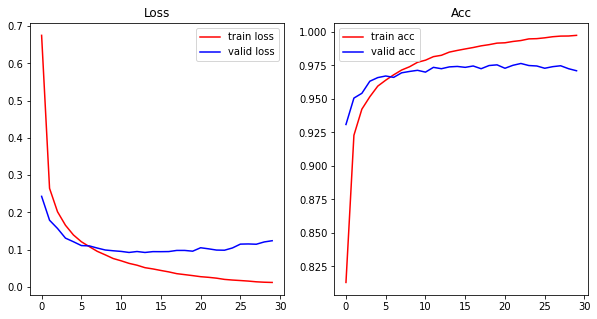

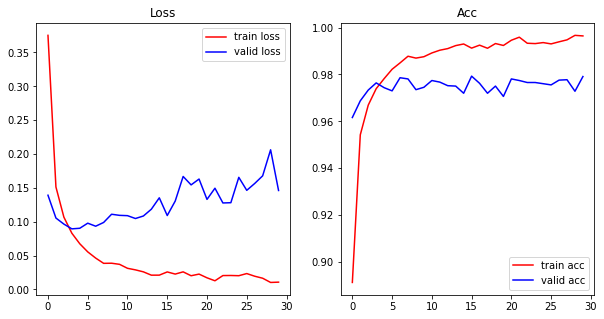

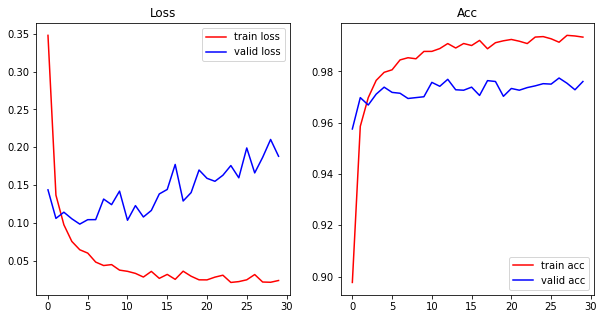

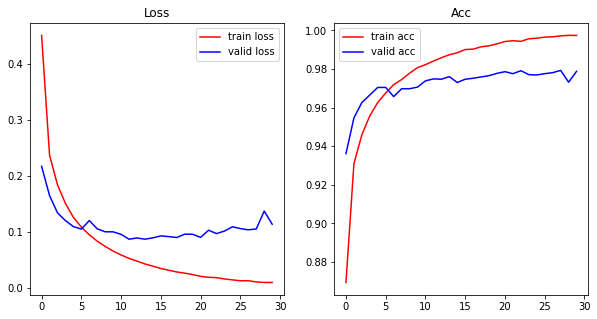

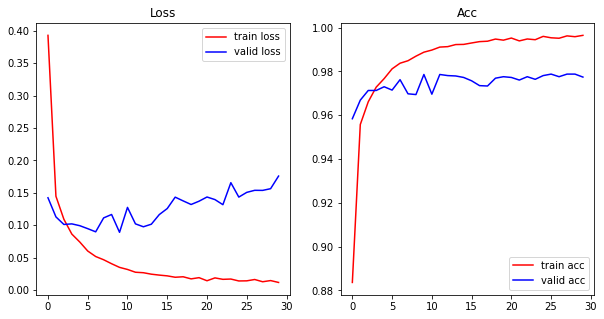

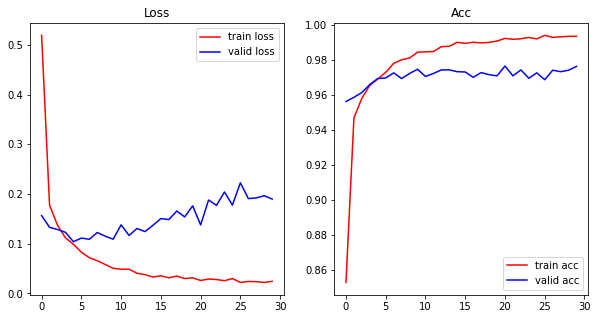

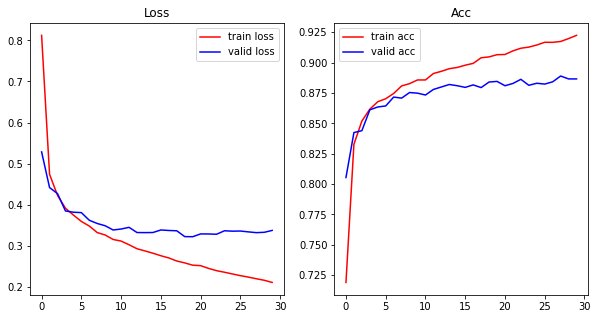

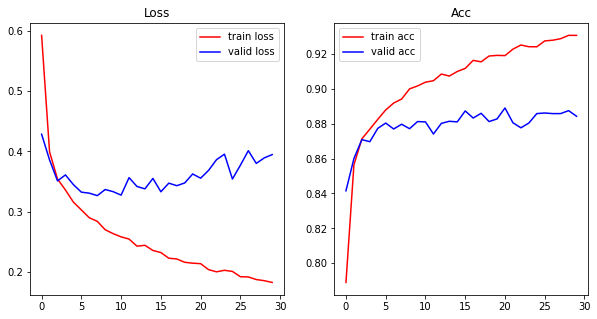

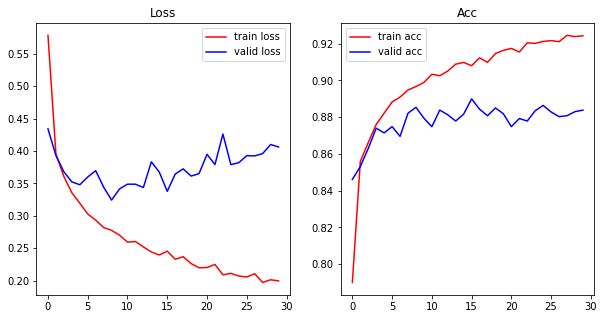

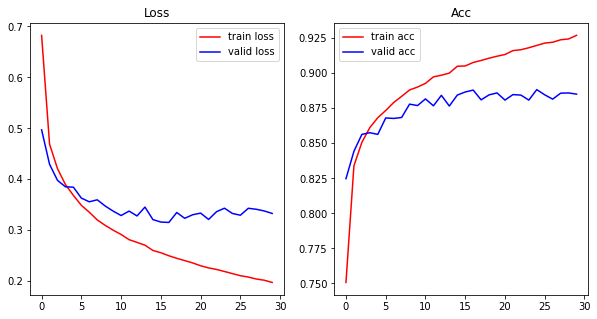

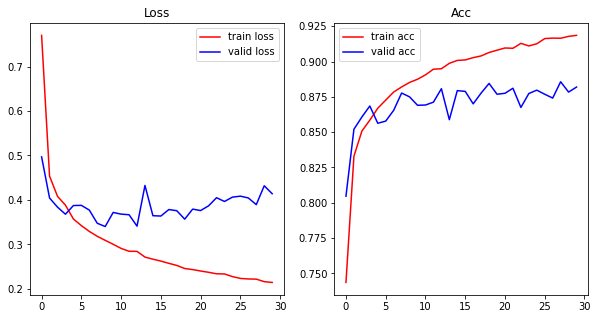

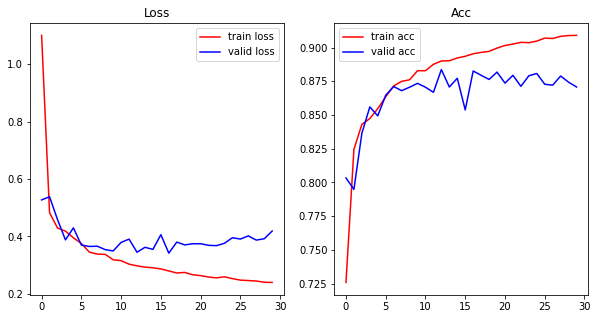

In [ ]:
for d in ds:
  for m in models:
    for opt in opts:
      for lr in lrs:
        for max_epochs in max_epoch:
          model = get_model(model_name = m)
          trainer = Trainer(model=model, opt=opt, lr=lr)
          print(f"===== Data: {d}, Model: {m}, Optimizer: {opt}, lr: {lr}, max_epochs: {max_epochs} =====")
          trainer.train(data_name=d, train_loader=datas[d][0], valid_loader=datas[d][1], max_epochs=max_epochs)
          trainer.test(test_loader=datas[d][2])

## 조건 4 (dropout을 추가한 모델)

모델 : three   (dropout을 추가한 모델)
옵티마이저 : adam, rmsprop (sgd는 성능이 좋지 않아 뺐다.모델이 달라지면 다를 수도 있지만 우선 진행)   
학습률 : 0.005 , 0.007 (0.001을 뺐다.)   
에포크 : 30  

mnist = 97.75%
   
===== Data: mnist, Model: three, Optimizer: adam, lr: 0.005, max_epochs: 30 =====   
★★★★★★ 트레이닝 결과 ★★★★★★    
Epoch: 0, train loss: 0.434944, train acc: 0.865978, valid loss: 0.125177,    valid acc: 0.962806   
Epoch: 10, train loss: 0.146359, train acc: 0.957068, valid loss: 0.078430,    valid acc: 0.977582   
Epoch: 20, train loss: 0.125107, train acc: 0.963560, valid loss: 0.071579,    valid acc: 0.978770   
★★★★★★ 테스트 결과 ★★★★★★   
Test loss: 0.088447, Test acc: 0.977564   
<!-- fminst = 8% -->

In [ ]:
ds = ["mnist", "fmnist"]
models = ["three"]
opts = ['adam','rmsprop']
lrs = [0.005,0.007]
max_epoch = [30]

===== Data: mnist, Model: three, Optimizer: adam, lr: 0.005, max_epochs: 30 =====
★★★★★★ 트레이닝 결과 ★★★★★★
Epoch: 0, train loss: 0.434944, train acc: 0.865978, valid loss: 0.125177, valid acc: 0.962806
Epoch: 10, train loss: 0.146359, train acc: 0.957068, valid loss: 0.078430, valid acc: 0.977582
Epoch: 20, train loss: 0.125107, train acc: 0.963560, valid loss: 0.071579, valid acc: 0.978770
★★★★★★ 테스트 결과 ★★★★★★
Test loss: 0.088447, Test acc: 0.977564
===== Data: mnist, Model: three, Optimizer: adam, lr: 0.007, max_epochs: 30 =====
★★★★★★ 트레이닝 결과 ★★★★★★
Epoch: 0, train loss: 0.438347, train acc: 0.865960, valid loss: 0.139360, valid acc: 0.960938
Epoch: 10, train loss: 0.180274, train acc: 0.950502, valid loss: 0.075632, valid acc: 0.975543
Epoch: 20, train loss: 0.156884, train acc: 0.956975, valid loss: 0.089569, valid acc: 0.974185
★★★★★★ 테스트 결과 ★★★★★★
Test loss: 0.116229, Test acc: 0.974359
===== Data: mnist, Model: three, Optimizer: rmsprop, lr: 0.005, max_epochs: 30 =====
★★★★★★ 트레이닝

KeyboardInterrupt: ignored

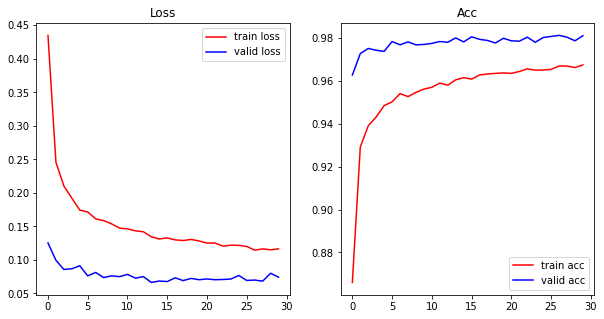

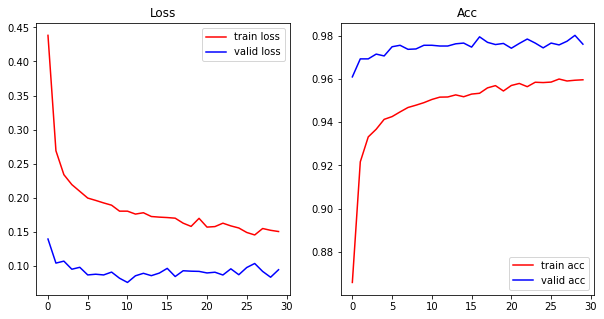

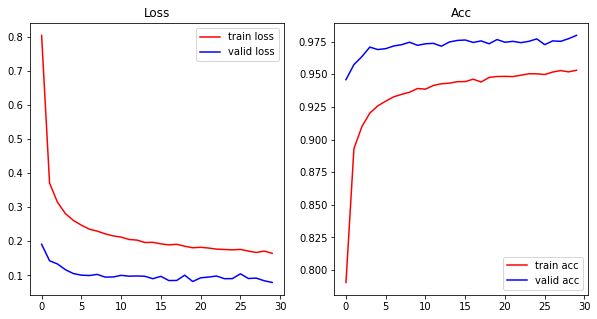

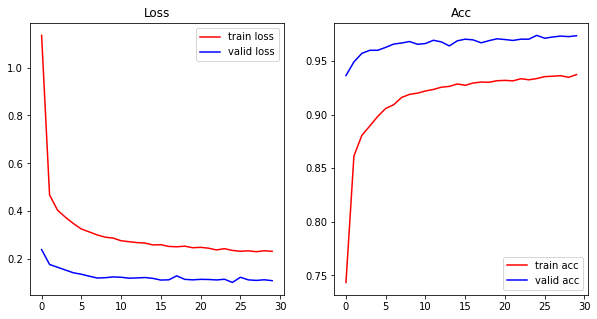

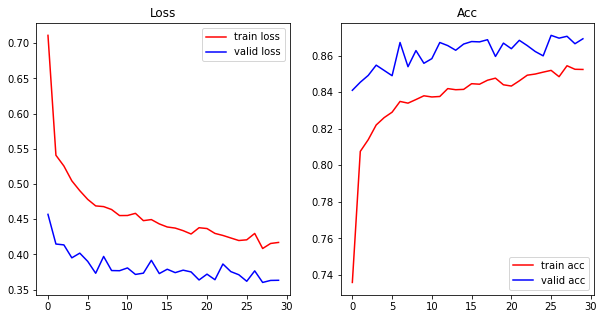

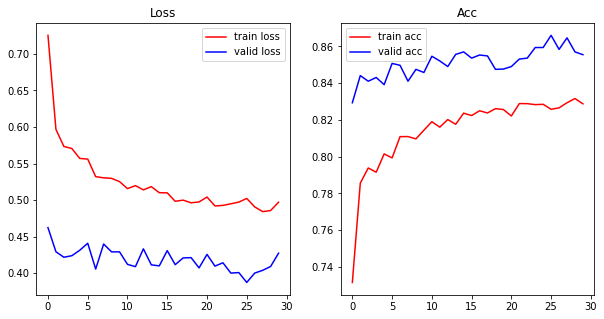

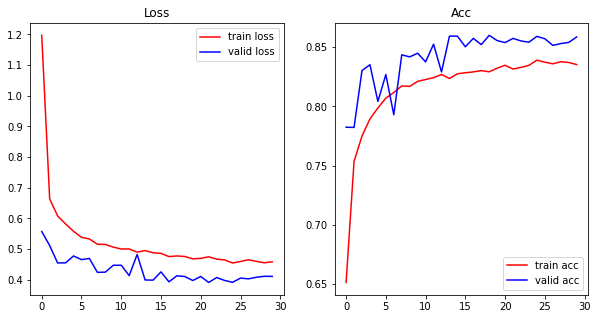

In [ ]:
for d in ds:
  for m in models:
    for opt in opts:
      for lr in lrs:
        for max_epochs in max_epoch:
          model = get_model(model_name = m)
          trainer = Trainer(model=model, opt=opt, lr=lr)
          print(f"===== Data: {d}, Model: {m}, Optimizer: {opt}, lr: {lr}, max_epochs: {max_epochs} =====")
          trainer.train(data_name=d, train_loader=datas[d][0], valid_loader=datas[d][1], max_epochs=max_epochs)
          trainer.test(test_loader=datas[d][2])

#### 다른 것보다 모델의 노드수가 우선적인 개선점인 것 같다.

## 조건 5

모델 : base2  
옵티마이저 : adam
학습률 : 0.001, 0.005 , 0.01
에포크 : 10,30  

mnist = Test loss: 0.145356, Test acc: 0.981270   
   ===== Data: mnist, Model: base2, Optimizer: adam, lr: 0.001, max_epochs: 30 =====         
      
mnist = Test loss: 0.378457, Test acc: 0.890425    
 ===== Data: fmnist, Model: base2, Optimizer: adam, lr: 0.001, max_epochs: 30 =====



In [ ]:
ds = ["mnist",'fmnist']
models = ["base2"]
opts = ['adam']
lrs = [0.001,0.005,0.01]
max_epoch = [10,30]

===== Data: mnist, Model: base2, Optimizer: adam, lr: 0.001, max_epochs: 10 =====
★★★★★★ 트레이닝 결과 ★★★★★★
Epoch: 0, train loss: 0.467106, train acc: 0.875279, valid loss: 0.175820, valid acc: 0.951087
★★★★★★ 테스트 결과 ★★★★★★
Test loss: 0.073235, Test acc: 0.979067
===== Data: mnist, Model: base2, Optimizer: adam, lr: 0.001, max_epochs: 30 =====
★★★★★★ 트레이닝 결과 ★★★★★★
Epoch: 0, train loss: 0.486620, train acc: 0.868564, valid loss: 0.188399, valid acc: 0.946501
Epoch: 10, train loss: 0.019892, train acc: 0.993936, valid loss: 0.075636, valid acc: 0.978940
Epoch: 20, train loss: 0.004559, train acc: 0.998698, valid loss: 0.095256, valid acc: 0.981148
★★★★★★ 테스트 결과 ★★★★★★
Test loss: 0.093747, Test acc: 0.981370
===== Data: mnist, Model: base2, Optimizer: adam, lr: 0.005, max_epochs: 10 =====
★★★★★★ 트레이닝 결과 ★★★★★★
Epoch: 0, train loss: 0.291045, train acc: 0.912481, valid loss: 0.110623, valid acc: 0.966882
★★★★★★ 테스트 결과 ★★★★★★
Test loss: 0.099405, Test acc: 0.975461
===== Data: mnist, Model: ba

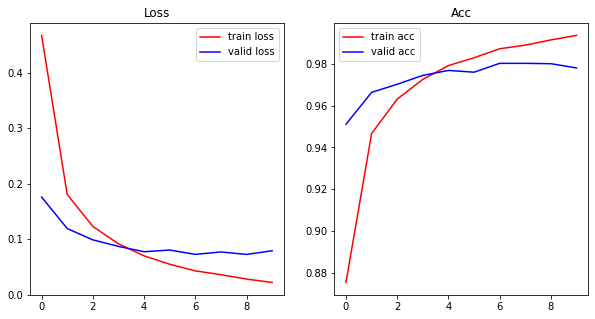

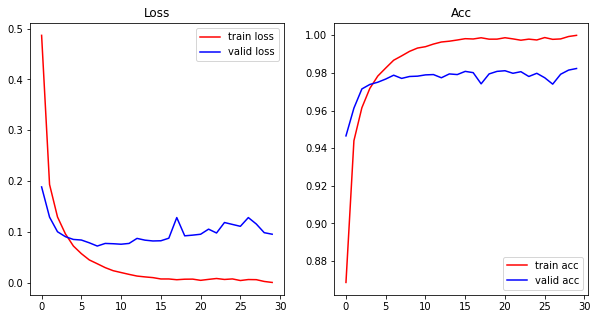

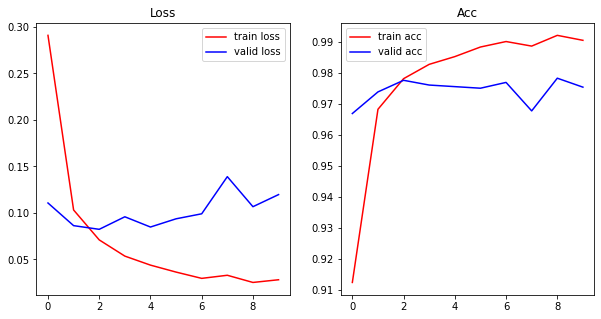

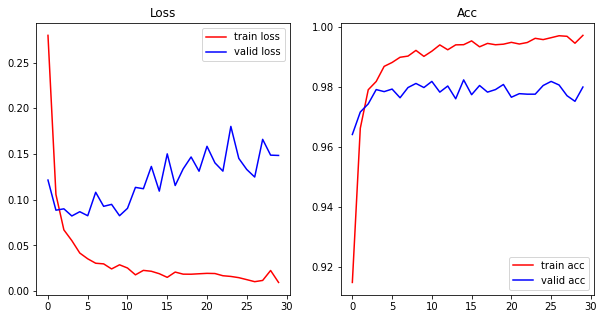

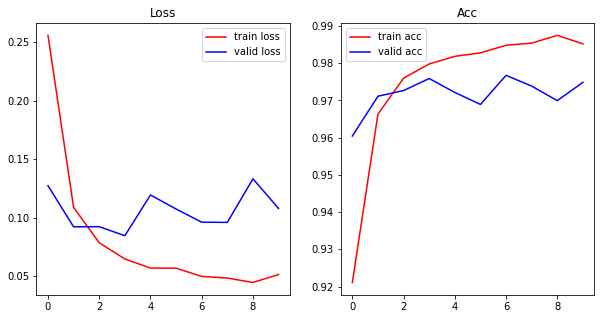

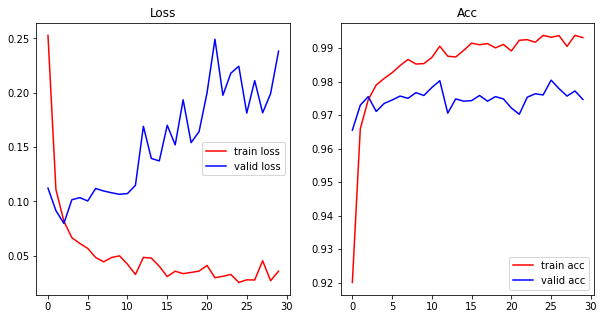

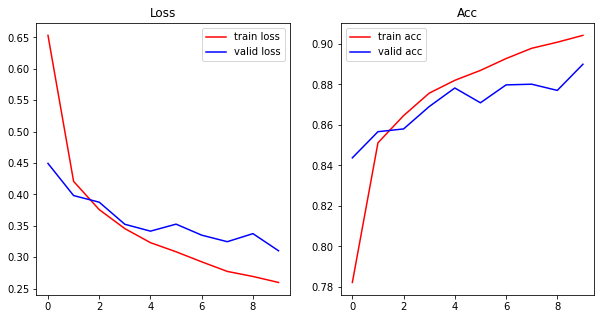

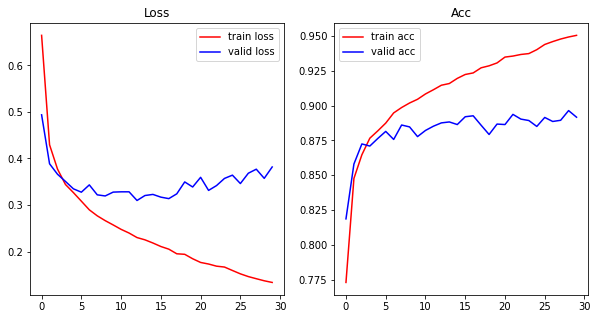

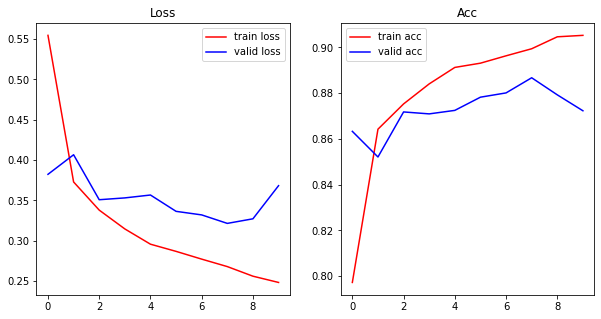

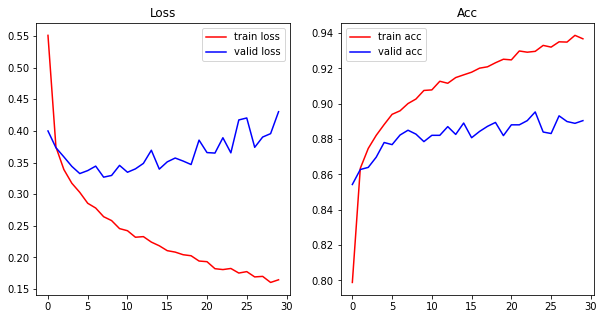

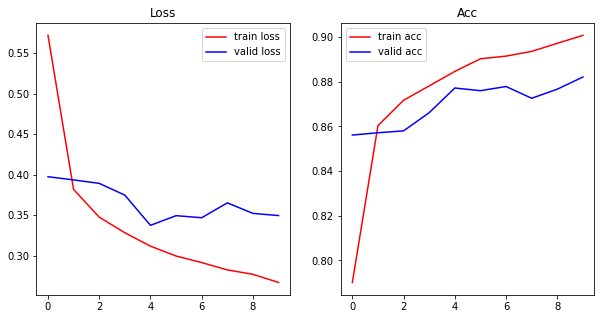

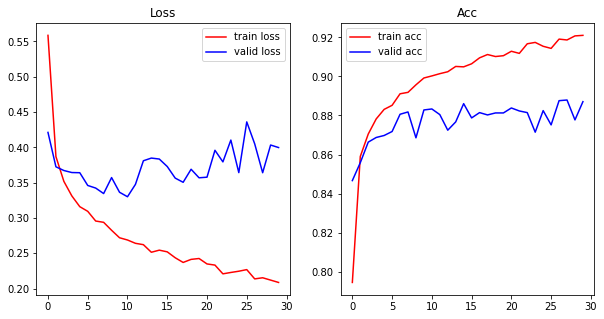

In [ ]:
for d in ds:
  for m in models:
    for opt in opts:
      for lr in lrs:
        for max_epochs in max_epoch:
          model = get_model(model_name = m)
          trainer = Trainer(model=model, opt=opt, lr=lr)
          print(f"===== Data: {d}, Model: {m}, Optimizer: {opt}, lr: {lr}, max_epochs: {max_epochs} =====")
          trainer.train(data_name=d, train_loader=datas[d][0], valid_loader=datas[d][1], max_epochs=max_epochs)
          trainer.test(test_loader=datas[d][2])

## 조건 6

===== Data: mnist, Model: base2, Optimizer: rmsprop, lr: 0.001, max_epochs: 50 =====
★★★★★★ 트레이닝 결과 ★★★★★★
Epoch: 0, train loss: 0.352720, train acc: 0.891574, valid loss: 0.131824, valid acc: 0.962806
Epoch: 10, train loss: 0.014406, train acc: 0.995685, valid loss: 0.082180, valid acc: 0.980808
Epoch: 20, train loss: 0.004323, train acc: 0.998810, valid loss: 0.107383, valid acc: 0.980469
Epoch: 30, train loss: 0.004698, train acc: 0.998735, valid loss: 0.119346, valid acc: 0.982677
Epoch: 40, train loss: 0.003409, train acc: 0.999014, valid loss: 0.132582, valid acc: 0.981827
★★★★★★ 테스트 결과 ★★★★★★
Test loss: 0.140579, Test acc: 0.980268


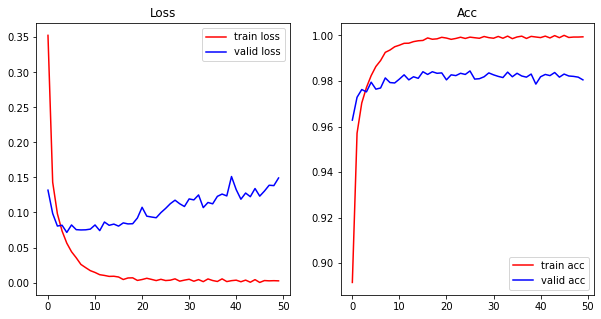

In [ ]:
# 조건 6

ds = ["mnist"]
models = ["base2"]
opts = ['rmsprop']
lrs = [0.001]
max_epoch = [50]

for d in ds:
  for m in models:
    for opt in opts:
      for lr in lrs:
        for max_epochs in max_epoch:
          model = get_model(model_name = m)
          trainer = Trainer(model=model, opt=opt, lr=lr)
          print(f"===== Data: {d}, Model: {m}, Optimizer: {opt}, lr: {lr}, max_epochs: {max_epochs} =====")
          trainer.train(data_name=d, train_loader=datas[d][0], valid_loader=datas[d][1], max_epochs=max_epochs)
          trainer.test(test_loader=datas[d][2])


## 조건 7

===== Data: mnist, Model: base2, Optimizer: adam, lr: 0.001, max_epochs: 50 =====
★★★★★★ 트레이닝 결과 ★★★★★★
Epoch: 0, train loss: 0.474138, train acc: 0.871856, valid loss: 0.187760, valid acc: 0.950238
Epoch: 10, train loss: 0.018580, train acc: 0.994866, valid loss: 0.073482, valid acc: 0.981148
Epoch: 20, train loss: 0.008029, train acc: 0.997080, valid loss: 0.105205, valid acc: 0.980129
Epoch: 30, train loss: 0.000129, train acc: 1.000000, valid loss: 0.100047, valid acc: 0.983696
Epoch: 40, train loss: 0.000045, train acc: 1.000000, valid loss: 0.109119, valid acc: 0.983865
★★★★★★ 테스트 결과 ★★★★★★
Test loss: 0.082590, Test acc: 0.983273


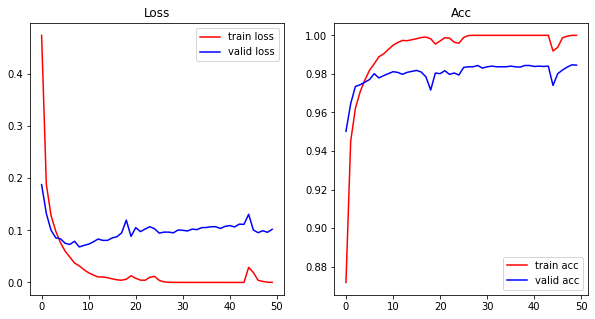

In [ ]:
# 조건 7

ds = ["mnist"]
models = ["base2"]
opts = ['adam']
lrs = [0.001]
max_epoch = [50]

for d in ds:
  for m in models:
    for opt in opts:
      for lr in lrs:
        for max_epochs in max_epoch:
          model = get_model(model_name = m)
          trainer = Trainer(model=model, opt=opt, lr=lr)
          print(f"===== Data: {d}, Model: {m}, Optimizer: {opt}, lr: {lr}, max_epochs: {max_epochs} =====")
          trainer.train(data_name=d, train_loader=datas[d][0], valid_loader=datas[d][1], max_epochs=max_epochs)
          trainer.test(test_loader=datas[d][2])


## 조건 8

결론 epoch이 클수록 성능이 좋다

===== Data: mnist, Model: base2, Optimizer: adam, lr: 0.001, max_epochs: 10 =====
★★★★★★ 트레이닝 결과 ★★★★★★
Epoch: 0, train loss: 0.472949, train acc: 0.873437, valid loss: 0.184262, valid acc: 0.946162
★★★★★★ 테스트 결과 ★★★★★★
Test loss: 0.076745, Test acc: 0.976663
===== Data: mnist, Model: base2, Optimizer: adam, lr: 0.001, max_epochs: 20 =====
★★★★★★ 트레이닝 결과 ★★★★★★
Epoch: 0, train loss: 0.475347, train acc: 0.869289, valid loss: 0.183495, valid acc: 0.950747
Epoch: 10, train loss: 0.019327, train acc: 0.994475, valid loss: 0.083739, valid acc: 0.978940
★★★★★★ 테스트 결과 ★★★★★★
Test loss: 0.102961, Test acc: 0.974359
===== Data: mnist, Model: base2, Optimizer: adam, lr: 0.001, max_epochs: 30 =====
★★★★★★ 트레이닝 결과 ★★★★★★
Epoch: 0, train loss: 0.485322, train acc: 0.869996, valid loss: 0.180222, valid acc: 0.949049
Epoch: 10, train loss: 0.020235, train acc: 0.994401, valid loss: 0.083199, valid acc: 0.978601
Epoch: 20, train loss: 0.006243, train acc: 0.998289, valid loss: 0.092539, valid acc: 0.

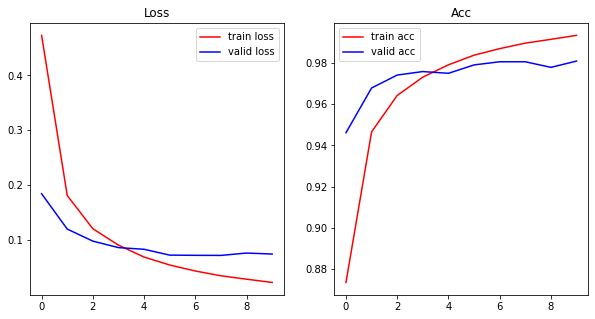

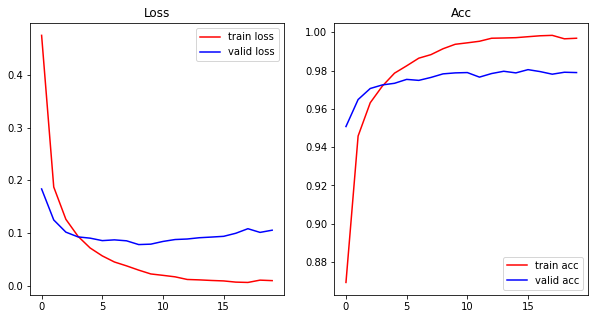

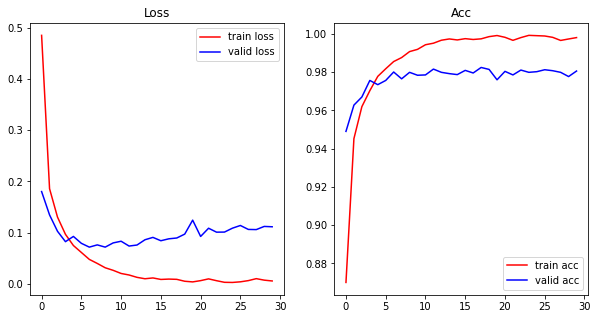

In [ ]:
# 조건 8

ds = ["mnist"]
models = ["base2"]
opts = ['adam']
lrs = [0.001]
max_epoch = [10,20,30]

for d in ds:
  for m in models:
    for opt in opts:
      for lr in lrs:
        for max_epochs in max_epoch:
          model = get_model(model_name = m)
          trainer = Trainer(model=model, opt=opt, lr=lr)
          print(f"===== Data: {d}, Model: {m}, Optimizer: {opt}, lr: {lr}, max_epochs: {max_epochs} =====")
          trainer.train(data_name=d, train_loader=datas[d][0], valid_loader=datas[d][1], max_epochs=max_epochs)
          trainer.test(test_loader=datas[d][2])


## 조건 9

base2 모델 노드 수 늘리고, epoch 30 (50은 해봤고 30이 나음)

--> 결과가 조금 좋다

===== Data: mnist, Model: base3, Optimizer: adam, lr: 0.001, max_epochs: 30 =====
★★★★★★ 트레이닝 결과 ★★★★★★
Epoch: 0, train loss: 0.410121, train acc: 0.890774, valid loss: 0.155993, valid acc: 0.955503
Epoch: 10, train loss: 0.012562, train acc: 0.996317, valid loss: 0.075397, valid acc: 0.981318
Epoch: 20, train loss: 0.006140, train acc: 0.997935, valid loss: 0.107061, valid acc: 0.979959
★★★★★★ 테스트 결과 ★★★★★★
Test loss: 0.089023, Test acc: 0.983373


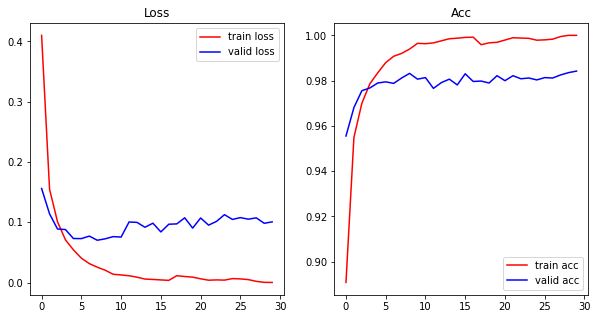

In [ ]:
# 조건 9

ds = ["mnist"]
models = ["base3"]
opts = ['adam']
lrs = [0.001]
max_epoch = [30]

for d in ds:
  for m in models:
    for opt in opts:
      for lr in lrs:
        for max_epochs in max_epoch:
          model = get_model(model_name = m)
          trainer = Trainer(model=model, opt=opt, lr=lr)
          print(f"===== Data: {d}, Model: {m}, Optimizer: {opt}, lr: {lr}, max_epochs: {max_epochs} =====")
          trainer.train(data_name=d, train_loader=datas[d][0], valid_loader=datas[d][1], max_epochs=max_epochs)
          trainer.test(test_loader=datas[d][2])


## 조건 10

===== Data: mnist, Model: base3, Optimizer: adam, lr: 0.001, max_epochs: 50 =====
★★★★★★ 트레이닝 결과 ★★★★★★
Epoch: 0, train loss: 0.417014, train acc: 0.888207, valid loss: 0.153481, valid acc: 0.956352
Epoch: 10, train loss: 0.012066, train acc: 0.996429, valid loss: 0.083942, valid acc: 0.982167
Epoch: 20, train loss: 0.010806, train acc: 0.996354, valid loss: 0.105481, valid acc: 0.979110
Epoch: 30, train loss: 0.005525, train acc: 0.997917, valid loss: 0.113400, valid acc: 0.982846
Epoch: 40, train loss: 0.000021, train acc: 1.000000, valid loss: 0.102853, valid acc: 0.986413
★★★★★★ 테스트 결과 ★★★★★★
Test loss: 0.098653, Test acc: 0.985176
===== Data: mnist, Model: base3, Optimizer: adam, lr: 0.001, max_epochs: 70 =====
★★★★★★ 트레이닝 결과 ★★★★★★
Epoch: 0, train loss: 0.424289, train acc: 0.886161, valid loss: 0.170124, valid acc: 0.951257
Epoch: 10, train loss: 0.012568, train acc: 0.996503, valid loss: 0.068242, valid acc: 0.983526
Epoch: 20, train loss: 0.004337, train acc: 0.998754, valid l

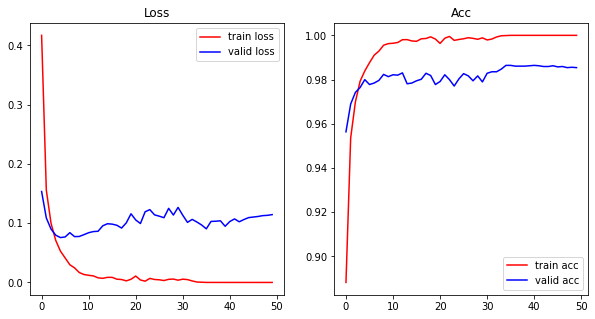

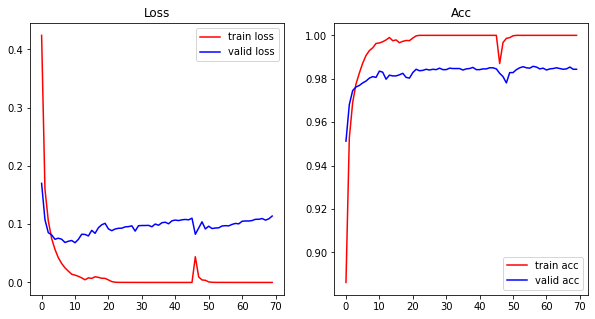

In [ ]:
# 조건 10

ds = ["mnist"]
models = ["base3"]
opts = ['adam']
lrs = [0.001]
max_epoch = [50,70]

for d in ds:
  for m in models:
    for opt in opts:
      for lr in lrs:
        for max_epochs in max_epoch:
          model = get_model(model_name = m)
          trainer = Trainer(model=model, opt=opt, lr=lr)
          print(f"===== Data: {d}, Model: {m}, Optimizer: {opt}, lr: {lr}, max_epochs: {max_epochs} =====")
          trainer.train(data_name=d, train_loader=datas[d][0], valid_loader=datas[d][1], max_epochs=max_epochs)
          trainer.test(test_loader=datas[d][2])

## 조건 11 (dropout + batch nomalization)

===== Data: mnist, Model: base3+no, Optimizer: adam, lr: 0.001, max_epochs: 50 =====
★★★★★★ 트레이닝 결과 ★★★★★★
Epoch: 0, train loss: 0.380793, train acc: 0.890848, valid loss: 0.116424, valid acc: 0.966372
Epoch: 10, train loss: 0.064760, train acc: 0.979111, valid loss: 0.055553, valid acc: 0.983186
Epoch: 20, train loss: 0.040198, train acc: 0.986663, valid loss: 0.052673, valid acc: 0.986753
Epoch: 30, train loss: 0.031220, train acc: 0.989286, valid loss: 0.058903, valid acc: 0.986413
Epoch: 40, train loss: 0.023900, train acc: 0.991983, valid loss: 0.057776, valid acc: 0.987942
★★★★★★ 테스트 결과 ★★★★★★
Test loss: 0.059831, Test acc: 0.984575


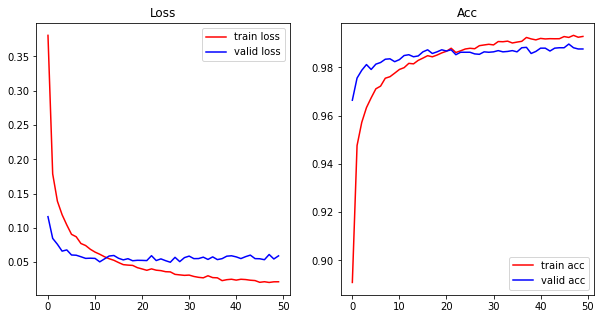

In [ ]:
# 조건 11

ds = ["mnist"]
models = ["base3+no"]
opts = ['adam']
lrs = [0.001]
max_epoch = [50]

for d in ds:
  for m in models:
    for opt in opts:
      for lr in lrs:
        for max_epochs in max_epoch:
          model = get_model(model_name = m)
          trainer = Trainer(model=model, opt=opt, lr=lr)
          print(f"===== Data: {d}, Model: {m}, Optimizer: {opt}, lr: {lr}, max_epochs: {max_epochs} =====")
          trainer.train(data_name=d, train_loader=datas[d][0], valid_loader=datas[d][1], max_epochs=max_epochs)
          trainer.test(test_loader=datas[d][2])


# MNIST dataset에 대해 찾은 최적의 조건

===== Data: mnist, Model: base3, Optimizer: adam, lr: 0.001, max_epochs: 50 =====
★★★★★★ 트레이닝 결과 ★★★★★★
Epoch: 0, train loss: 0.417522, train acc: 0.884542, valid loss: 0.153385, valid acc: 0.958390
Epoch: 10, train loss: 0.012188, train acc: 0.996354, valid loss: 0.082850, valid acc: 0.981658
Epoch: 20, train loss: 0.002157, train acc: 0.999479, valid loss: 0.094049, valid acc: 0.983865
Epoch: 30, train loss: 0.001565, train acc: 0.999554, valid loss: 0.095542, valid acc: 0.985224
Epoch: 40, train loss: 0.000039, train acc: 1.000000, valid loss: 0.106329, valid acc: 0.984545
★★★★★★ 테스트 결과 ★★★★★★
Test loss: 0.104194, Test acc: 0.984175


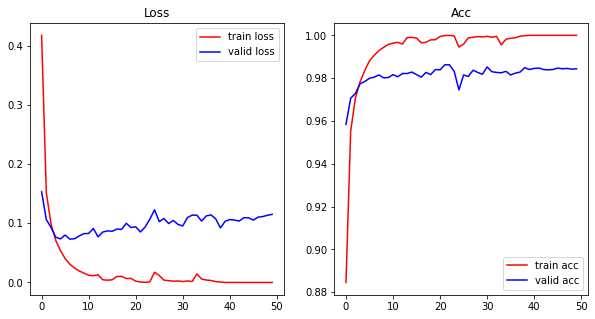

In [ ]:
# MNIST dataset에 대해 여러분이 찾은 최적의 조건으로 학습을 한 번 더 진행해 주세요.
d = "mnist"
m = "base3"
opt = "adam"
lr = 0.001
max_epochs = 50

model = get_model(model_name = m)
trainer = Trainer(model=model, opt=opt, lr=lr)
print(f"===== Data: {d}, Model: {m}, Optimizer: {opt}, lr: {lr}, max_epochs: {max_epochs} =====")
trainer.train(data_name=d, train_loader=datas[d][0], valid_loader=datas[d][1], max_epochs=max_epochs)
trainer.test(test_loader=datas[d][2])

# FashionMNIST dataset에 대해 찾은 최적의 조건

===== Data: fmnist, Model: base3, Optimizer: adam, lr: 0.001, max_epochs: 50 =====
★★★★★★ 트레이닝 결과 ★★★★★★
Epoch: 0, train loss: 0.627832, train acc: 0.782515, valid loss: 0.434267, valid acc: 0.845958
Epoch: 10, train loss: 0.230503, train acc: 0.913969, valid loss: 0.311191, valid acc: 0.888927
Epoch: 20, train loss: 0.164357, train acc: 0.938597, valid loss: 0.315832, valid acc: 0.897418
Epoch: 30, train loss: 0.115592, train acc: 0.956417, valid loss: 0.377806, valid acc: 0.897758
Epoch: 40, train loss: 0.083791, train acc: 0.968564, valid loss: 0.477249, valid acc: 0.891984
★★★★★★ 테스트 결과 ★★★★★★
Test loss: 0.534960, Test acc: 0.893129


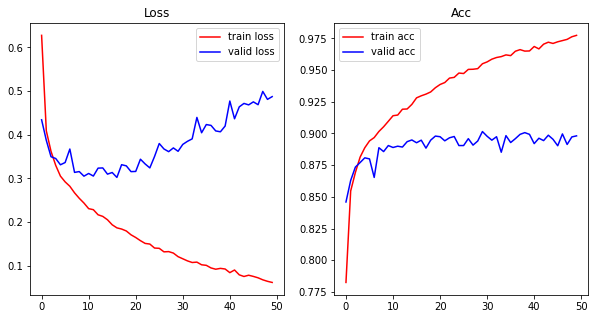

In [ ]:
# FashionMNIST dataset에 대해 여러분이 찾은 최적의 조건으로 학습을 한 번 더 진행해 주세요.
d = "fmnist"
m = "base3"
opt = "adam"
lr = 0.001
max_epochs = 50

model = get_model(model_name = m)
trainer = Trainer(model=model, opt=opt, lr=lr)
print(f"===== Data: {d}, Model: {m}, Optimizer: {opt}, lr: {lr}, max_epochs: {max_epochs} =====")
trainer.train(data_name=d, train_loader=datas[d][0], valid_loader=datas[d][1], max_epochs=max_epochs)
trainer.test(test_loader=datas[d][2])